# Práctica 1: Aprendizaje automático

__Fecha de entrega: XX de YYY de 2022 (CAMBIAR PARA DAR 3 SEMANAS A CADA GRUPO)__

El objetivo de esta práctica es aplicar los distintos algoritmos de aprendizaje automático disponibles en la scikit-learn [sklearn](https://scikit-learn.org/stable/) sobre varios conjuntos de datos y aprender a interpretar los resultados obtenidos. La práctica consta de 2 notebooks que se entregarán simultáneamente en la tarea de entrega habilitada en el Campus  Virtual.

Lo más importante en esta práctica no es el código Python, sino el análisis de los datos y modelos que construyas y las explicaciones razonadas de cada una de las decisiones que tomes. __No se valorarán trozos de código o gráficas sin ningún tipo de contexto o explicación__.

Finalmente, recuerda establecer el parámetro `random_state` en todas las funciones que tomen decisiones aleatorias para que los resultados sean reproducibles (los resultados no varíen entre ejecuciones).

# Apartado 1: Clustering

__Número de grupo: 31__

__Nombres de los estudiantes: Miguel Antonio Amato Hermo y Alejandro Tobías Ángeles__

In [4]:
# acceso a google drive

from google.colab import drive
drive.mount('/content/drive')

ModuleNotFoundError: No module named 'google'

## 1) Carga del conjunto de datos

Crea un dataframe a partir del fichero `Mall_Customers.csv` que se proporciona junto con la práctica. 

El conjunto de datos contiene por cada fila los datos de un préstamo que fue concedido por una empresa de crédito p2p. Las variables que caracterizan el préstamo son las siguientes:
  - `Customer ID` es el identificador del cliente
  - `Gender` es el género del cliente (Male|Female)
  - `Annual Income` son los ingresos anuales en cientos de dólares del cliente
  - `Age` es la edad del cliente
  - `Spending Score` es una puntuación asignada por el mall basada en el comportamiento del cliente y a sus gastos

In [11]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('Mall_Customers.csv', index_col = 0)
df

,Gender,Age,Annual Income (k$),Spending Score (1-100)
CustomerID,,,,
1,Male,19,15,39
2,Male,21,15,81
3,Female,20,16,6
4,Female,23,16,77
5,Female,31,17,40
...,...,...,...,...
196,Female,35,120,79
197,Female,45,126,28
198,Male,32,126,74


## 2) Análisis de los datos

### 2.1) Numéricos

Analiza razonadamente las distribuciones de cada una de las variables numéricas (medias, desviaciones típicas, rangos, ...) y las principales relaciones entre pares de variables (diagrama de dispersión, coeficientes de correlación, ...).

In [18]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Age,200.0,38.85,13.969007,18.0,28.75,36.0,49.0,70.0
Annual Income (k$),200.0,60.56,26.264721,15.0,41.50,61.5,78.0,137.0
Spending Score (1-100),200.0,50.20,25.823522,1.0,34.75,50.0,73.0,99.0


Para realizar la descripción estadística de cada una de las variables numéricas, se ha utilizado la función describe() de pandas. Utilizando la funcion describe() ya conseguimos una primera aproximación a los datos, ya que nos muestra la media, la desviación típica, el valor mínimo, el valor máximo y los cuartiles de cada una de las variables numéricas.

In [19]:
df.corr()


C:\Users\htm19\AppData\Local\Temp\ipykernel_5680\1134722465.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,Age,Annual Income (k$),Spending Score (1-100)
Age,1.000000,-0.012398,-0.327227
Annual Income (k$),-0.012398,1.000000,0.009903
Spending Score (1-100),-0.327227,0.009903,1.000000


<Axes: xlabel='Age', ylabel='Annual Income (k$)'>

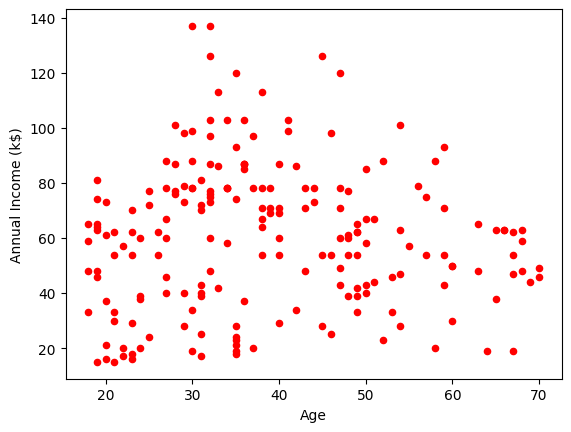

In [35]:
df.plot.scatter(x='Age', y='Annual Income (k$)', c='Red')

<Axes: xlabel='Age', ylabel='Spending Score (1-100)'>

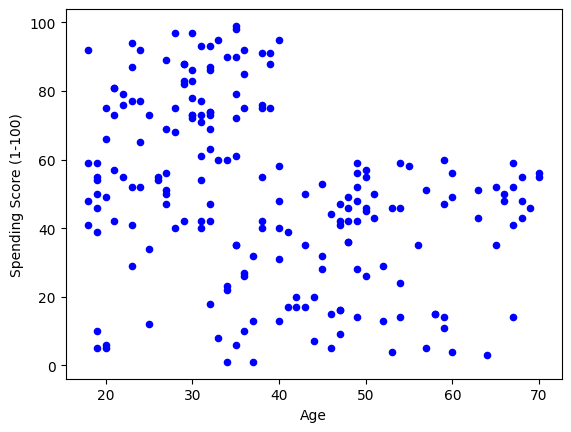

In [31]:
df.plot.scatter(x='Age', y='Spending Score (1-100)', c='Blue')

<Axes: xlabel='Spending Score (1-100)', ylabel='Annual Income (k$)'>

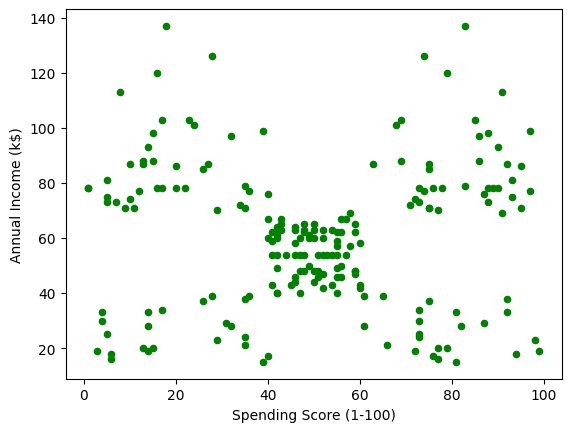

In [33]:
df.plot.scatter(x='Spending Score (1-100)', y='Annual Income (k$)', c='Green')

A continuación se presenta un diagrama de dispersión de tipo scatter matrix para poder ver todos los pares al mismo tiempo.

array([[<Axes: xlabel='Age', ylabel='Age'>,
        <Axes: xlabel='Annual Income (k$)', ylabel='Age'>,
        <Axes: xlabel='Spending Score (1-100)', ylabel='Age'>],
       [<Axes: xlabel='Age', ylabel='Annual Income (k$)'>,
        <Axes: xlabel='Annual Income (k$)', ylabel='Annual Income (k$)'>,
        <Axes: xlabel='Spending Score (1-100)', ylabel='Annual Income (k$)'>],
       [<Axes: xlabel='Age', ylabel='Spending Score (1-100)'>,
        <Axes: xlabel='Annual Income (k$)', ylabel='Spending Score (1-100)'>,
        <Axes: xlabel='Spending Score (1-100)', ylabel='Spending Score (1-100)'>]],
      dtype=object)

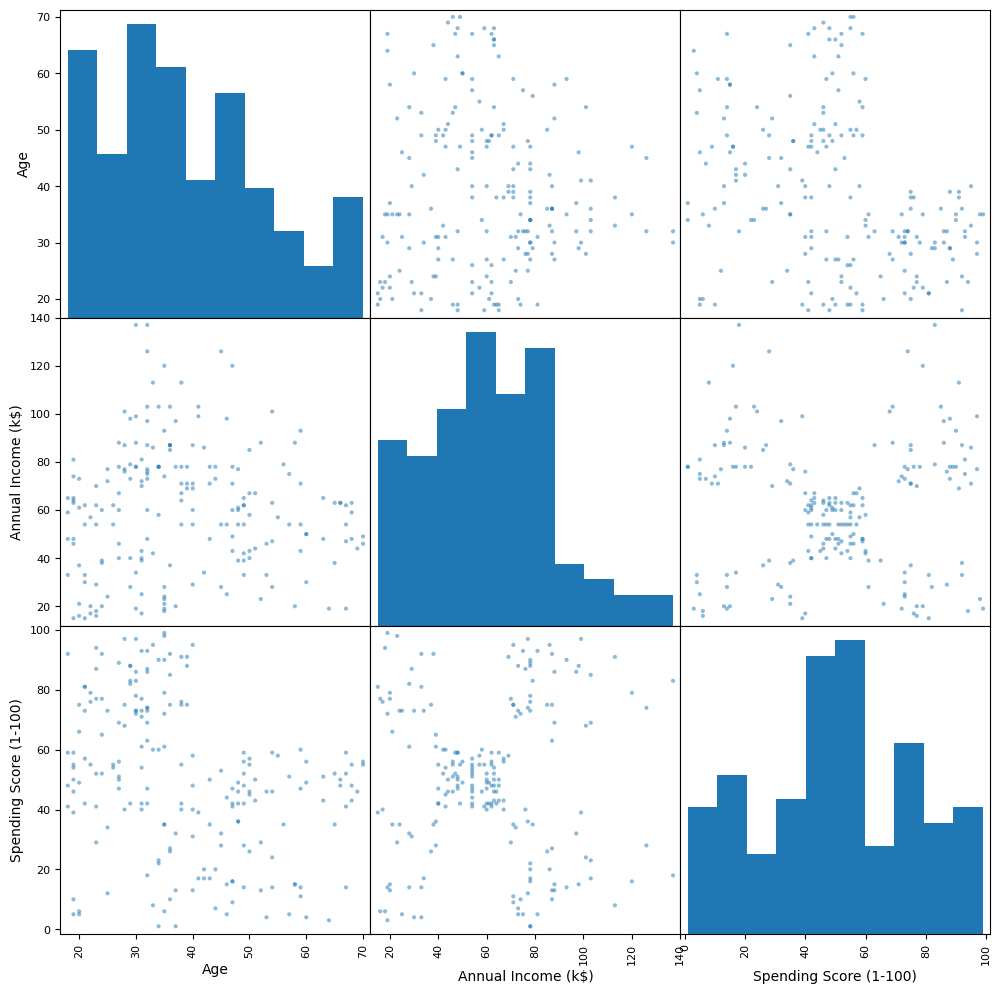

In [37]:
from pandas.plotting import scatter_matrix
%matplotlib inline

scatter_matrix(df, figsize = (12, 12), diagonal = 'hist')

Como puede apreciarse las varibles numéricas no presentan relación entre ellas, esto puede apreciarse tanto en la tabla de correlaciones como en los diagramas de dispersión. 


### 2.2) Categóricos

Analiza razonadamente las distribuciones de los valores de las variables categóricas incluyendo un diagrama de frecuencias y comentando lo más destacable.

## 3) Preprocesar los datos

Para el clustering vamos a trabajar solamente con las variables `Annual income`, y `spending score`.

Teniendo en cuenta que vamos a utilizar el algoritmo k-Means para encontrar grupos de clientes similares, explica razonadamente si es necesario o no cambiar la escalas de los datos y si a priori es mejor reescalarlos (MinMaxScaler) o estandarizarlos (StandarScaler).

Si decides preprocesarlos, accede al array interno del dataframe y crea un nuevo array con los datos escalados.

## 4) Encontrar el número óptimo de clusters

Decide razonadamente el número óptimo de clusters en el rango 2..10. Ten en cuenta que para interpretar los datos no nos interesa tampoco tener un número excesivo de clusters. Para hacerlo calcula y pinta el diagrama del codo y el índice davies_boulding en función del número de clusters.

## 5) Descripción de los clusters

Describe los clusters que has obtenido en el apartado anterior. Si te han salido más de 5 elige 5 de ellos que sean bastante diferentes entre sí. 

Para hacerlo estudia sus descriptores estadísticos y dales un sentido dentro del contexto del problema. ¿Qué perfil de clientes quedan en cada cluster? 

__Cuidado__: para poder interpretar correctamente los datos necesitas que estén en su escala original. Si decidiste escalar los datos, deberás ejecutar k-Means con los datos escalados pero asignar las etiquetas de clusters al conjunto de datos inicial. En este caso es muy sencillo porque el algoritmo no cambia el orden de los datos así que puedes crear directamente una nueva columna en el dataframe original con esas etiquetas. Puede que aparezca un SettingWithCopyWarning por asignar una nueva columna en un dataframe que es una vista de otro dataframe. Puedes ignorar este aviso o puedes hacer una copia del dataframe con `copy` para que no comparta memoria con el otro.

## 6) Clustering jerárquico aglomerativo
Repite los apartados 4 y 5 usando clustering jerárquico aglomerativo.

